To address the question regarding the educational platform using the front-door criterion, let's start by defining the key components of this causal inference method, then set up an example involving motivational messages and student engagement.

Variables and Mediator
Main Variables:
Treatment (T): Sending motivational messages (binary: 0 = no message sent, 1 = message sent).
Outcome (Y): Student engagement (measured as a continuous or ordinal variable, e.g., time spent on tasks, interaction rates).
Mediator (M):
Mediator: The student's perception of the motivational message (e.g., perceived encouragement, feeling valued).
Controls (Z): While the front-door criterion does not necessarily require controlling for confounders between T and M, or M and Y, if any observed variables influence both the treatment and the mediator or the mediator and the outcome, they should be controlled for. This might include:
Student's initial engagement level.
Student's previous academic performance.
Contextual factors like time of day or day of the week.
Front-Door Criterion Conditions
The front-door criterion allows us to infer causality when there are unobserved confounders between the treatment and the outcome, given that the following conditions are met:

The treatment must affect the outcome only through the mediator. This implies there should be no unblocked back-door paths from the treatment to the outcome that bypass the mediator.
No unmeasured confounding between the treatment and the mediator. There should be no hidden variables that affect both the treatment (sending motivational messages) and the mediator (student’s perception of the message).
No unmeasured confounding between the mediator and the outcome after accounting for the treatment. Once the message is sent and perceived, no other unobserved factors should influence the engagement except through the perception of the message.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
# Simulate data
np.random.seed(42)
n = 500  # number of students
T = np.random.binomial(1, 0.5, n)  # treatment assignment
M = 0.3 * T + np.random.normal(0, 1, n)  # mediator (perception)
Y = 2 * M + np.random.normal(0, 1, n)  # outcome (engagement)

data = pd.DataFrame({'T': T, 'M': M, 'Y': Y})

# Add a confounder for demonstration (e.g., initial engagement level)
Z = np.random.normal(2, 0.5, n)
data['Z'] = Z
M = 0.5 * T + 0.3 * Z + np.random.normal(0, 1, n)
Y = 1.5 * M + 0.2 * Z + np.random.normal(0, 1, n)
data['M'] = M
data['Y'] = Y


In [3]:
# Step 2a: Model the mediator as a function of the treatment
model_m = smf.ols('M ~ T + Z', data=data).fit()

# Step 2b: Model the outcome as a function of the mediator and the treatment
model_y = smf.ols('Y ~ M + T + Z', data=data).fit()

print("Effect of T on M (Path Coefficient a):", model_m.params['T'])
print("Effect of M on Y controlling for T (Path Coefficient b):", model_y.params['M'])

# Calculate the indirect effect
indirect_effect = model_m.params['T'] * model_y.params['M']
print("Estimated indirect effect of T on Y through M:", indirect_effect)

Effect of T on M (Path Coefficient a): 0.6144940733721563
Effect of M on Y controlling for T (Path Coefficient b): 1.4807823646259803
Estimated indirect effect of T on Y through M: 0.9099319870166723


Explanation and Interpretation
This code first simulates a scenario where motivational messages are sent to students and models the perceived encouragement as a mediator. The indirect effect of the treatment on the outcome via the mediator is then estimated, assuming that the front-door conditions are met. The coefficients provide insights into the strength and direction of these relationships.

This simple example outlines how the causal effect can be estimated while adhering to the requirements of the front-door criterion. For real-world applications, especially in your paper, you would replace the simulated data with actual data from the educational platform, ensuring the model is correctly specified based on the data characteristics and the study design.

For further reading on the front-door criterion and its applications, you might consult sources like Pearl's "Causality: Models, Reasoning, and Inference" which offers comprehensive insights into causal inference models and their assumptions.

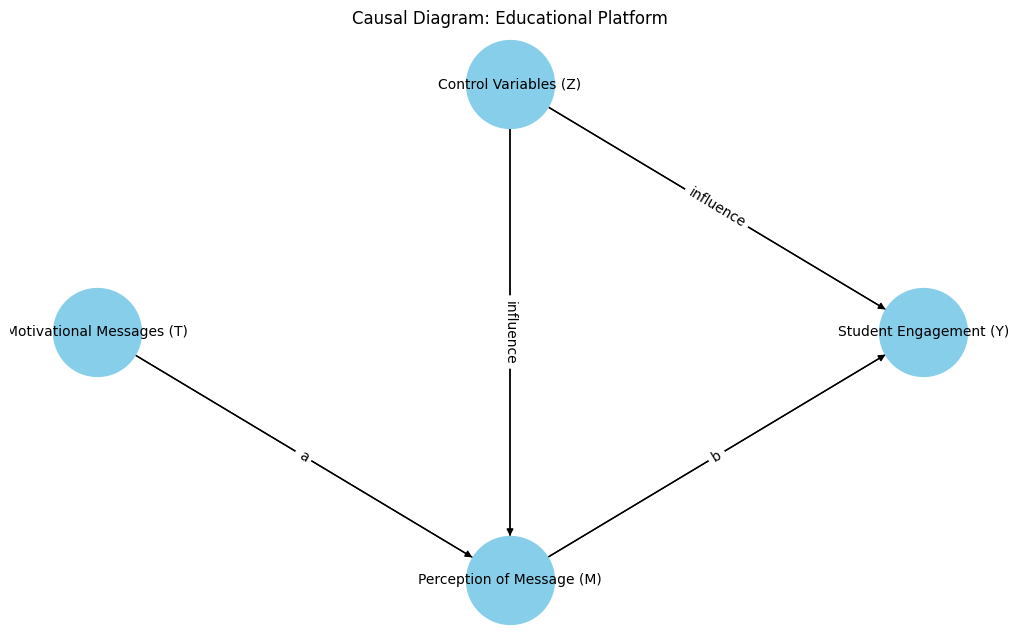

In [8]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes with labels
nodes = {
    'T': 'Motivational Messages (T)',
    'M': 'Perception of Message (M)',
    'Y': 'Student Engagement (Y)',
    'Z': 'Control Variables (Z)'
}
G.add_nodes_from(nodes.keys())

# Add edges with labels
edges = [
    ('T', 'M', {'label': 'a'}),
    ('M', 'Y', {'label': 'b'}),
    ('Z', 'M', {'label': 'influence'}),
    ('Z', 'Y', {'label': 'influence'})
]
G.add_edges_from(edges)

# Position nodes using a layout
pos = nx.shell_layout(G)

plt.figure(figsize=(10, 6))

# Draw nodes
nx.draw(G, pos, with_labels=False, node_size=4000, node_color='skyblue', font_size=10, font_weight='bold')

# Draw node labels
for p in pos:  # raise text positions
    pos[p][1] += 0.0
nx.draw_networkx_labels(G, pos, labels=nodes, font_size=10)

# Draw edges
nx.draw_networkx_edges(G, pos, edgelist=edges, arrowstyle='->', arrowsize=20)

# Draw edge labels
edge_labels = {(n1, n2): d['label'] for n1, n2, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Causal Diagram: Educational Platform')
plt.axis('off')  # Turn off the axis
plt.show()  # Display the graph




Here's the interpretation of the diagram:

Motivational Messages (T): This is the treatment or intervention variable. It represents whether motivational messages are sent to students or not.
Perception of Message (M): This is the mediator variable. It depicts how students perceive the motivational messages they receive. The perception of the messages is assumed to be the mechanism through which the motivational messages exert their influence on student engagement. This is indicated by the arrow labeled 'a' going from T to M.
Student Engagement (Y): This is the outcome variable. It measures the level of student engagement, which the educational platform aims to improve.
Control Variables (Z): These are variables that might influence both the mediator and the outcome, and therefore need to be controlled for to correctly estimate the causal effect. The control variables affect both the mediator and the outcome, as shown by the arrows labeled 'influence'.
The diagram also implicitly suggests the following causal assumptions:

There is no direct arrow from T to Y, which is consistent with the front-door criterion stating that the treatment affects the outcome only through the mediator (M). Any direct effect of T on Y is not considered in this model, which is typically denoted by a dashed line if it's a blocked path or simply omitted if it's assumed non-existent.
Arrows from Z to M and Z to Y imply that Z is a confounder for the mediator-outcome relationship, and therefore controlling for Z is necessary to accurately estimate the causal effect of M on Y.
The front-door criterion also assumes that there are no unobserved confounders between M and Y once we control for T, which is not depicted in the diagram but is a crucial assumption for the validity of this causal analysis.
Using this diagram, you would calculate the causal effect of the motivational messages on student engagement by first estimating the effect of T on M (arrow 'a'), and then the effect of M on Y (arrow 'b'), while controlling for Z. The product of these two effects gives you the indirect effect of T on Y through M, which, under the front-door criterion, would be the causal effect you're interested in.

In practice, this would involve statistical analysis, where you would model the mediator (M) as a function of the treatment (T) and the control variables (Z), and then model the outcome (Y) as a function of the mediator (M), the treatment (T), and the control variables (Z). By doing so, you're effectively isolating the path through which the treatment influences the outcome, allowing you to infer the causal effect of the treatment on the outcome through the mediator.